In [5]:
import os
import xarray as xr

# Folder where all the .nc files are stored
nc_directory = "../CH_data/CH_output_data/nival_no_regulation"

# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the mean of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the mean across all datasets for each variable
mean_ds = xr.concat(datasets, dim="iteration").mean(dim="iteration")

# Display the final dataset with mean values
mean_ds


C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:        (init_date: 9, target_period: 9)
Coordinates:
  * target_period  (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * init_date      (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    R2             (init_date, target_period) float64 0.1173 0.1347 ... 0.1771
    KGE"           (init_date, target_period) float64 -0.03233 ... -0.3637
    KGE"_r         (init_date, target_period) float64 0.1922 0.1103 ... -0.111
    KGE"_alpha     (init_date, target_period) float64 0.4351 0.4569 ... 0.6347
    KGE"_beta      (init_date, target_period) float64 0.01088 ... 0.05008
    perc_diff      (init_date, target_period) float64 2.399 2.467 ... nan 7.116

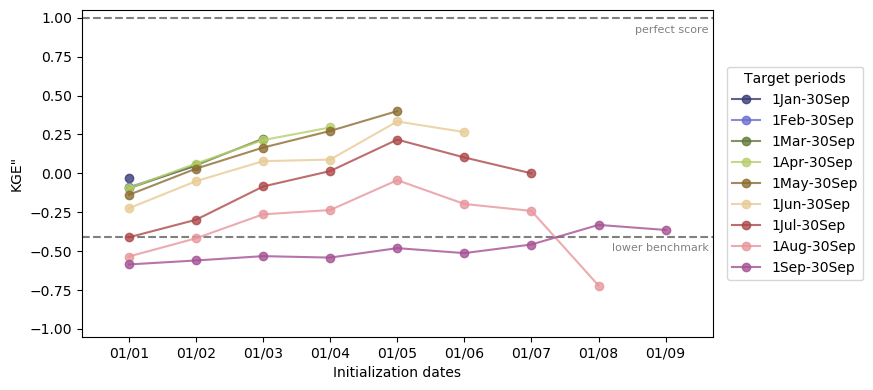

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Use the mean dataset loaded earlier (mean_ds) for the 'KGE"' data
KGE_mean = mean_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = mean_ds.target_period.values
init_dates = mean_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" mean data for each target period
    toplot = KGE_mean.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
# Load the specific .nc file with the number 2327
file_2327_path = "../CH_data/CH_output_data/nival_no_regulation/deterministic_verification_basin_2327.nc"
ds_2327 = xr.open_dataset(file_2327_path)

# Select the KGE" value from the file for 1st of May and target period 1May-30Sep
selected_kge_2327 = ds_2327['KGE"'].sel(init_date="01/05", target_period="1May-30Sep")

# Calculate the mean of the KGE" values across all iterations
mean_kge_2327 = selected_kge_2327.mean(dim='iteration')

# Display the mean KGE" value
mean_kge_2327

<xarray.DataArray 'KGE"' ()>
array(0.4525)
Coordinates:
    init_date      <U5 '01/05'
    target_period  <U10 '1May-30Sep'

In [11]:
# Folder where all the .nc files are stored

import xarray as xr
import os
import pandas as pd

# Folder where all the .nc files are stored
nc_directory = "../CH_data/CH_output_data/nival_no_regulation"

# List all the .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Dictionary to store the mean KGE" value for each file
mean_kge_values = {}

# Loop over each file, load the dataset, and calculate the mean KGE" for 1st May and 1May-30Sep
for file in nc_files:
    ds = xr.open_dataset(file)
    selected_kge = ds['KGE"'].sel(init_date="01/05", target_period="1May-30Sep")
    mean_kge = selected_kge.mean(dim='iteration')
    mean_kge_values[os.path.basename(file)] = mean_kge.item()  # Store the mean as a float

# Convert to DataFrame for display or further analysis
mean_kge_df = pd.DataFrame(list(mean_kge_values.items()), columns=['Basin File', 'Mean KGE"'])

# Display the result (you can adjust this to suit your project)
print(mean_kge_df)


                                 Basin File  Mean KGE"
0  deterministic_verification_basin_2219.nc    -0.6755
1  deterministic_verification_basin_2244.nc     0.5923
2  deterministic_verification_basin_2256.nc     0.3585
3  deterministic_verification_basin_2263.nc     0.6332
4  deterministic_verification_basin_2268.nc     0.2868
5  deterministic_verification_basin_2299.nc     0.6673
6  deterministic_verification_basin_2304.nc     0.7925
7  deterministic_verification_basin_2319.nc     0.4937
8  deterministic_verification_basin_2327.nc     0.4525
